# Description of students in MINTIC's digital skills courses, years 2019 & 2020

Republic of Colombia, STEM Education

Research Question: What demographic characteristics do the students of the Digital Skills courses offered by MINTIC have?

## Data collection and preparation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Data Science course dataset:
cd = pd.read_csv('assets/Habilidades_digitales_Ciencia_de_datos.csv')
cd['PROGRAMA'] = 'CIENCIA DE DATOS'

# Artificial Inteligence course dataset:
ia = pd.read_csv('assets/Habilidades_digitales_inteligencia_artificial.csv')
ia['PROGRAMA'] = 'INTELIGENCIA ARTIFICIAL'
ia['META_BENEFICIARIOS']=ia['META_BENEFICIARIOS'].replace(0, np.nan)

In [5]:
estudiantes = (pd.concat([cd,ia],ignore_index=True)
               .query("ESTADOS == 'BENEFICIARIO'")
               .drop(['ESTADOS','PLATAFORMA_EDUCATIVA','FECHA_CORTE','ESTADO_FORMACION','META_BENEFICIARIOS','META_DINERO','INVERSION','FECHA_VIGENCIA'], axis=1)
               .rename(columns={'NIVE_EDUCATIVO': 'NIVEL_EDUCATIVO'}))

In [33]:
# Number of applicants and students
cifras_cd = {'meta_beneficiarios' :int(cd['META_BENEFICIARIOS'].dropna().unique()),
             'num_aplicantes':len(cd),
             'num_beneficiarios':len(cd.query("ESTADOS == 'BENEFICIARIO'"))}

cifras_ia = {'meta_beneficiarios' :int(ia['META_BENEFICIARIOS'].dropna().unique()),
             'num_aplicantes':len(ia),
             'num_beneficiarios':len(ia.query("ESTADOS == 'BENEFICIARIO'"))}


plantilla = '''
{}
Meta de estudiantes: {}

Número de beneficiados: {}
Total aplicantes: {}
'''

print(plantilla.format("CIENCIA DE DATOS",cifras_cd['meta_beneficiarios'],cifras_cd['num_beneficiarios'],cifras_cd['num_aplicantes']))
print('-'*30)
print(plantilla.format("INTELIGENCIA ARTIFICIAL",cifras_ia['meta_beneficiarios'],cifras_ia['num_beneficiarios'],cifras_ia['num_aplicantes']))


CIENCIA DE DATOS
Meta de estudiantes: 1713

Número de beneficiados: 849
Total aplicantes: 32294

------------------------------

INTELIGENCIA ARTIFICIAL
Meta de estudiantes: 4413

Número de beneficiados: 9309
Total aplicantes: 77919



## Demographic data

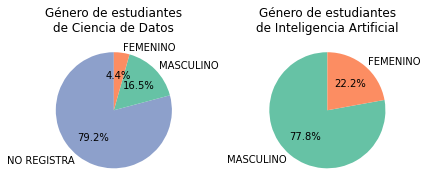

In [306]:
# Gender of students
genero_cd = estudiantes.query("PROGRAMA == 'CIENCIA DE DATOS'")['GENERO'].value_counts()
genero_ia = estudiantes.query("PROGRAMA == 'INTELIGENCIA ARTIFICIAL'")['GENERO'].value_counts()

palette = sns.color_palette('Set2',3)
colors = {'MASCULINO': palette[0], 'FEMENINO': palette[1],'NO REGISTRA': palette[2]}

plt.subplot(1,2,1)
plt.title('Género de estudiantes\nde Ciencia de Datos')
plt.pie(genero_cd, labels=genero_cd.index,
        autopct='%1.1f%%', startangle=90,
        colors=[colors[key] for key in genero_cd.index])

plt.subplot(1,2,2)
plt.title('Género de estudiantes\nde Inteligencia Artificial')
plt.pie(genero_ia, labels=genero_ia.index,
        autopct='%1.1f%%', startangle=90,
        colors=[colors[key] for key in genero_ia.index])

plt.tight_layout()
plt.show()

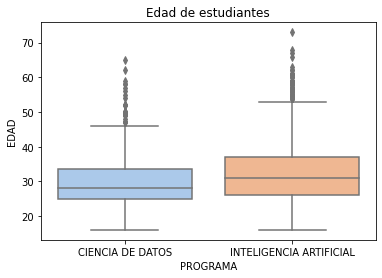

In [39]:
# Age of students

# Se observa que hay posibles valores perdidos de edad (EDAD=0) o incorrectos en el contexto (EDAD=8)}
# print('Edades menores de edad:',set(estudiantes[estudiantes['EDAD']<18]['EDAD']),'\n')

sns.boxplot(y='EDAD', x='PROGRAMA', data=estudiantes.query('EDAD >= 16'), palette='pastel').set_title('Edad de estudiantes');

In [40]:
# Resumen de las estadísticas de edad, sin contar datos incoherentes:
print(estudiantes.query('EDAD >= 16').groupby('PROGRAMA').describe())

                           EDAD                                               \
                          count       mean       std   min   25%   50%   75%   
PROGRAMA                                                                       
CIENCIA DE DATOS          811.0  30.262639  7.234780  16.0  25.0  28.0  33.5   
INTELIGENCIA ARTIFICIAL  4896.0  32.071487  8.267872  16.0  26.0  31.0  37.0   

                               
                          max  
PROGRAMA                       
CIENCIA DE DATOS         65.0  
INTELIGENCIA ARTIFICIAL  73.0  


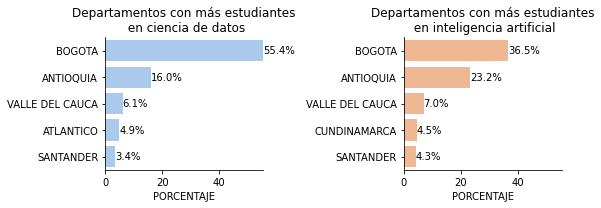

In [309]:
# Location of students by Colombian department

# Get the data by percentage of students in each department
def top_5_departamentos(dataset,programa):
    df = dataset[dataset["PROGRAMA"] == programa]
    total_estudiantes = len(df)
    
    estudiantes_dep = df.groupby('DEPARTAMENTO').size().reset_index(name='CONTEO')
    estudiantes_dep['PORCENTAJE'] = (estudiantes_dep['CONTEO'] / total_estudiantes) * 100
    
    return estudiantes_dep.nlargest(5, 'CONTEO')

dep_cd = top_5_departamentos(estudiantes, "CIENCIA DE DATOS")
dep_ia = top_5_departamentos(estudiantes, "INTELIGENCIA ARTIFICIAL")



# Draw the bar plots
palette = sns.color_palette('pastel', 2)

def añadir_etiquetas_porcentajes (df,ax):
    for index, value in enumerate(df['PORCENTAJE']):
        ax.text(value, index, f'{value:.1f}%', va='center', ha='left', fontsize=10, color='black')
    
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))   
sns.despine()

sns.barplot(data=dep_cd,
            x='PORCENTAJE',
            y='DEPARTAMENTO',
            color=palette[0],
            ax=ax1)
ax1.set_title("Departamentos con más estudiantes\n en ciencia de datos")
ax1.set(ylabel=None)
añadir_etiquetas_porcentajes(dep_cd,ax1)

sns.barplot(data=dep_ia, x='PORCENTAJE',y='DEPARTAMENTO',color=palette[1],ax=ax2)
ax2.set_title("Departamentos con más estudiantes\n en inteligencia artificial")
añadir_etiquetas_porcentajes(dep_ia,ax2)
ax2.set(ylabel=None)

# Set the same X-width
max_porcentaje = max(dep_cd['PORCENTAJE'].max(), dep_ia['PORCENTAJE'].max())
ax1.set_xlim(0, max_porcentaje)
ax2.set_xlim(0, max_porcentaje)   

plt.tight_layout()
plt.show()